In [22]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [23]:
ls 100ns

bsub_chignolin_score_msmlag100ns_splittica_alleigen.sh
chignolin_cktest_lag100ns_outto1800ns.pdf
chignolin_cktest_lag100ns_outto1800ns.png
chignolin_cktest_lag10ns_outto1800ns.pdf
chignolin_cktest_lag10ns_outto1800ns.png
chignolin_cktest_lag150ns_outto1800ns.pdf
chignolin_cktest_lag150ns_outto1800ns.png
chignolin_cktest_lag200ns_outto1800ns.pdf
chignolin_cktest_lag200ns_outto1800ns.png
chignolin_cktest_lag50ns_outto1800ns.pdf
chignolin_cktest_lag50ns_outto1800ns.png
chignolin_dtrajs_100ns.npy
chignolin_fractions_100ns.pdf
chignolin_fractions_100ns.png
chignolin_its_100ns.pdf
chignolin_its_100ns.png
chignolin_its_multilag.pdf
chignolin_its_multilag.png
chignolin_its_multilag_2eigen.pdf
chignolin_its_multilag_2eigen.png
chignolin_msmlag100ns_2eigen_vamp2.pdf
chignolin_msmlag100ns_2eigen_vamp2.png
chignolin_msmlag100ns_3eigen_vamp2.pdf
chignolin_msmlag100ns_3eigen_vamp2.png
chignolin_postprocess_100ns.ipynb
chignolin_score_msmlag100ns_splittica_alleigen.py
chignolin_top_model_100ns.ipynb


In [24]:
dtrajs = list(np.load('100ns/chignolin_dtrajs_100ns.npy'))

In [26]:
# 150 ns MSM lag

In [27]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 750)

In [28]:
pcca = msm.pcca(2)

In [29]:
pcca.coarse_grained_stationary_probability

array([ 0.20253309,  0.79746691])

In [30]:
# 0 is unfolded, 1 is folded

In [31]:
msm.metastable_sets

[array([  0,   2,   3,   4,   6,   7,   8,  10,  11,  12,  13,  14,  15,
         16,  18,  19,  20,  21,  22,  24,  25,  26,  28,  29,  31,  32,
         33,  34,  35,  36,  37,  38,  39,  40,  41,  43,  44,  46,  48,
         49,  50,  52,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,
         64,  66,  67,  68,  69,  70,  71,  72,  73,  76,  77,  78,  79,
         80,  81,  84,  85,  86,  88,  90,  91,  93,  94,  97,  98, 100,
        102, 103, 104, 105, 106, 109, 110, 112, 113, 116, 117, 118, 119,
        124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 136, 137, 138,
        139, 140, 142, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 178, 179, 180, 182, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 196, 197, 198]),
 array([  1,   5,   9,  17,  23,  27,  30,  42,  45,  47,  51,  58,  65,
         74,  75,  82,  83,  87,  89,  92,  95,  96,  99, 101, 107, 1

In [32]:
meta_sets = msm.metastable_sets

In [33]:
np.save('chignolin_scorelag100ns_metastable_sets', msm.metastable_sets)

In [34]:
meta_membs = msm.metastable_memberships

In [35]:
np.save('chignolin_scorelag100ns_metastable_memberships', msm.metastable_memberships)

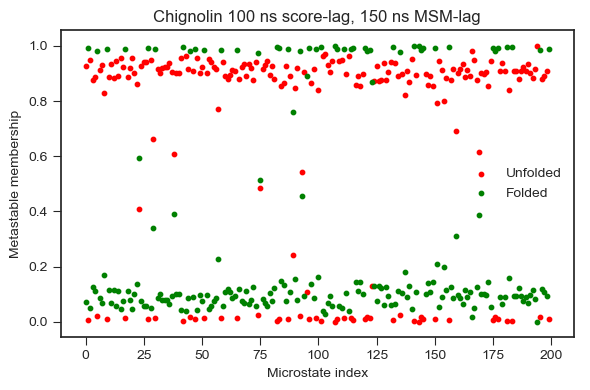

In [38]:
plt.figure(dpi=100)
plt.scatter(range(200), meta_membs[:,0], color='red', s=10, label='Unfolded')
plt.scatter(range(200), meta_membs[:,1], color='green', s=10, label='Folded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('Chignolin 100 ns score-lag, 150 ns MSM-lag')
plt.legend()
plt.tight_layout()
plt.savefig('chignolin_scorelag100ns_metastable_membs.png', dpi=300)
plt.show()